<a href="https://colab.research.google.com/github/Ben-Najafloo/Emails-Spam-Detection/blob/main/spam_email.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dependencies

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score

# First dataset (mail_data) collection.And then preprocessing

In [ ]:
row_data = pd.read_csv('/content/mail_data.csv')

In [ ]:
print(row_data)

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [ ]:
data = row_data.where((pd.notnull(row_data)),'')

# Labbeling categories

Text considered is from human (ham) : 1


Text considered as a spam : 0

In [ ]:
data.loc[data['Category'] == 'spam', 'Category',] = 0
data.loc[data['Category'] == 'ham', 'Category',] = 1

# Separating data as
 text (Y)

 category (X)

In [ ]:
X = data['Message']
Y = data['Category']

# Spliting data to train and test

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

# Feature Extraction

Convert text (message) to the features vectors

In [ ]:
feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english', lowercase=True)

In [ ]:
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

In [ ]:
Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

# Training the models

In [ ]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

Logistic Regression

Evaluationg the logistic trained model

In [ ]:
# model_logistic = LogisticRegression()

# model_logistic.fit(X_train_features, Y_train)
# prediction_on_training_data = model_logistic.predict(X_train_features)

# accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)
# precision_on_training_data = precision_score(Y_train, prediction_on_training_data)
# recall_on_training_data = recall_score(Y_train, prediction_on_training_data)

In [ ]:
# print('Accuracy on training data : ', accuracy_on_training_data)
# print('Precision on training data : ', precision_on_training_data)
# print('Recall on training data : ', recall_on_training_data)

In [ ]:
# Define a dictionary to store models and their performance
models = {
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": MultinomialNB(),
    "Gradient Boosting": GradientBoostingClassifier()
}

# Function to train and evaluate each model
def evaluate_model(model, X_train, Y_train, X_test, Y_test):
    model.fit(X_train, Y_train)
    predictions = model.predict(X_test)

    accuracy = accuracy_score(Y_test, predictions)
    precision = precision_score(Y_test, predictions)
    recall = recall_score(Y_test, predictions)

    return accuracy, precision, recall

# Loop through each model and evaluate
for model_name, model in models.items():
    accuracy, precision, recall = evaluate_model(model, X_train_features, Y_train, X_test_features, Y_test)
    print(f"{model_name}:")
    print(f"  Accuracy: {accuracy}")
    print(f"  Precision: {precision}")
    print(f"  Recall: {recall}")
    print("="*30)


Logistic Regression:
  Accuracy: 0.9668161434977578
  Precision: 0.9628886659979939
  Recall: 1.0
Support Vector Machine:
  Accuracy: 0.979372197309417
  Precision: 0.9766022380467956
  Recall: 1.0
Decision Tree:
  Accuracy: 0.9659192825112107
  Precision: 0.9665991902834008
  Recall: 0.9947916666666666
Random Forest:
  Accuracy: 0.9757847533632287
  Precision: 0.9726443768996961
  Recall: 1.0
Naive Bayes:
  Accuracy: 0.9730941704035875
  Precision: 0.9696969696969697
  Recall: 1.0
Gradient Boosting:
  Accuracy: 0.95695067264574
  Precision: 0.9523809523809523
  Recall: 1.0


Logistic Regression:
  Accuracy: 0.9668161434977578
  Precision: 0.9628886659979939
  Recall: 1.0
Support Vector Machine:
  Accuracy: 0.979372197309417
  Precision: 0.9766022380467956
  Recall: 1.0
Decision Tree:
  Accuracy: 0.9650224215246637
  Precision: 0.9656218402426694
  Recall: 0.9947916666666666
Random Forest:
  Accuracy: 0.9757847533632287
  Precision: 0.9726443768996961
  Recall: 1.0
Naive Bayes:
  Accuracy: 0.9730941704035875
  Precision: 0.9696969696969697
  Recall: 1.0
Gradient Boosting:
  Accuracy: 0.957847533632287
  Precision: 0.9533267130089375
  Recall: 1.0


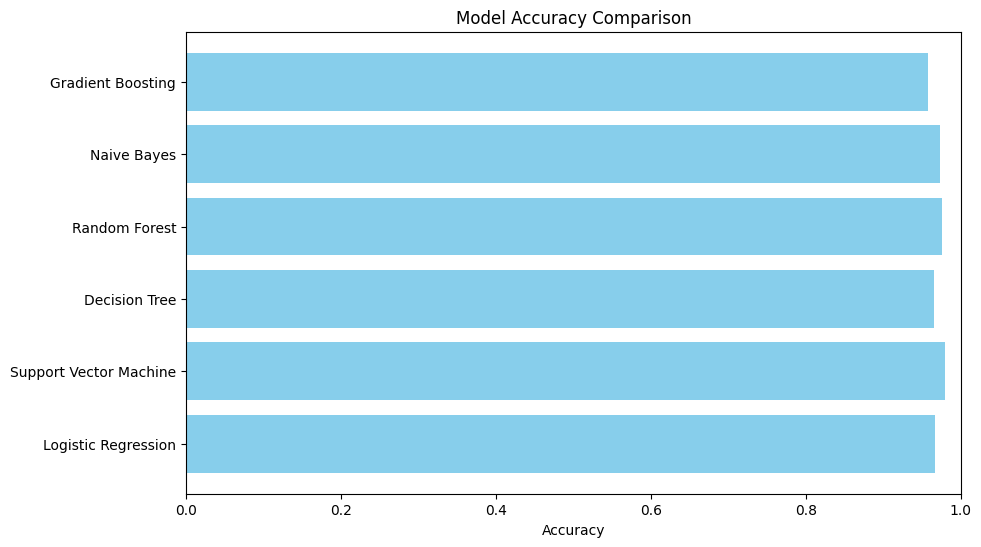

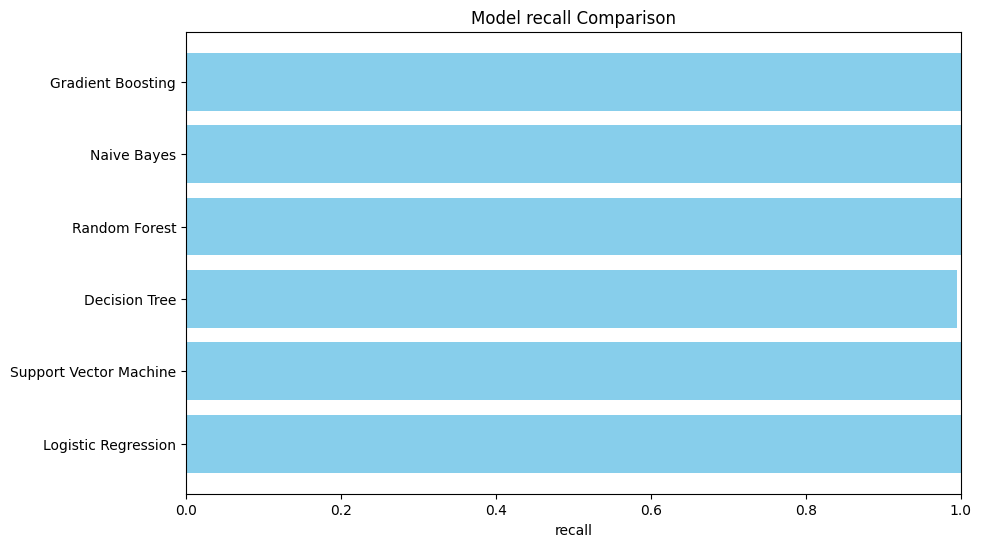

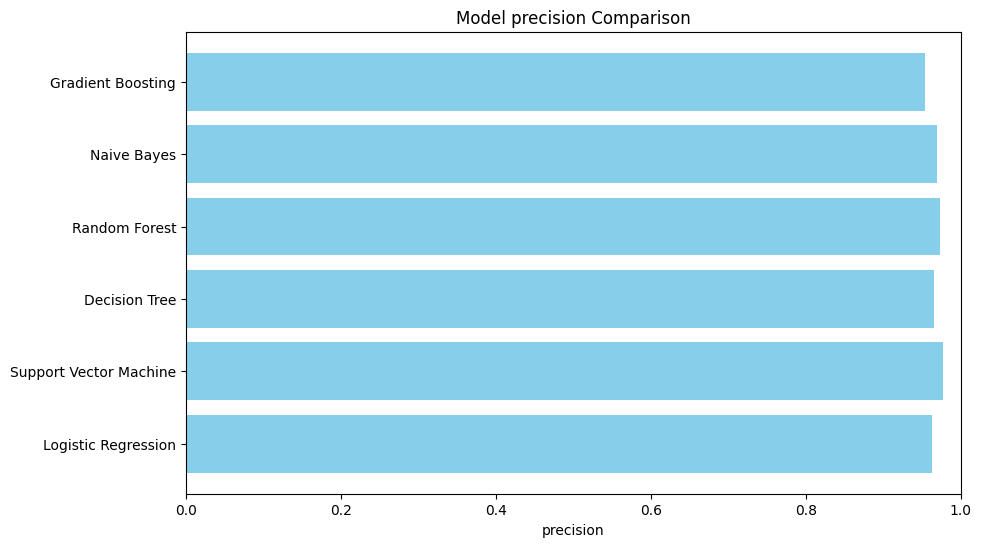

In [ ]:
import matplotlib.pyplot as plt

# Store the results for each model
model_names = []
accuracies = []
recalls = []
precisions = []

# Evaluate each model and store the results
for model_name, model in models.items():
    accuracy, precision, recall = evaluate_model(model, X_train_features, Y_train, X_test_features, Y_test)
    model_names.append(model_name)
    accuracies.append(accuracy)
    recalls.append(recall)
    precisions.append(precision)
    print(f"{model_name}:")
    print(f"  Accuracy: {accuracy}")
    print(f"  Precision: {precision}")
    print(f"  Recall: {recall}")
    print("="*30)

# Plot the accuracy results
plt.figure(figsize=(10, 6))
plt.barh(model_names, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xlim(0, 1)  # Since accuracy is between 0 and 1
plt.show()

# Plot the recall results
plt.figure(figsize=(10, 6))
plt.barh(model_names, recalls, color='skyblue')
plt.xlabel('recall')
plt.title('Model recall Comparison')
plt.xlim(0, 1)  # Since recall is between 0 and 1
plt.show()

# Plot the precision results
plt.figure(figsize=(10, 6))
plt.barh(model_names, precisions, color='skyblue')
plt.xlabel('precision')
plt.title('Model precision Comparison')
plt.xlim(0, 1)  # Since precision is between 0 and 1
plt.show()


In [ ]:
row_data2 = pd.read_csv('/content/spam_ham_dataset.csv')

In [ ]:
row_data2.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [ ]:
data2 = row_data2.where((pd.notnull(row_data)),'')

In [ ]:
# Drop rows with null values in the 'text' column
data2 = row_data2.dropna(subset=['text'])

# Ensure 'text' column is of type string
data2['text'] = data2['text'].astype(str)


X2 = data2['text']
Y2 = data2['label_num']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, Y2, test_size=0.2, random_state=42)
feature_extraction2 = TfidfVectorizer(min_df = 1, stop_words='english', lowercase=True)
X_train_features2 = feature_extraction2.fit_transform(X_train2)
X_test_features2 = feature_extraction2.transform(X_test2)

In [ ]:
y_train2 = y_train2.astype('int')
y_test2 = y_test2.astype('int')

In [ ]:
model_logistic = LogisticRegression()
model_logistic.fit(X_train_features2, y_train2)
prediction_on_training_data = model_logistic.predict(X_train_features2)

accuracy_on_training_data2 = accuracy_score(y_train2, prediction_on_training_data)
precision_on_training_data2 = precision_score(y_train2, prediction_on_training_data)
recall_on_training_data2 = recall_score(y_train2, prediction_on_training_data)

In [ ]:
print('Accuracy on training data : ', accuracy_on_training_data2)
print('Precision on training data : ', precision_on_training_data2)
print('Recall on training data : ', recall_on_training_data2)

Accuracy on training data :  0.9961315280464217
Precision on training data :  0.9869067103109657
Recall on training data :  1.0


In [ ]:
email = "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

email_features = feature_extraction2.transform([email])
prediction = model_logistic.predict(email_features)
print(prediction)

if (prediction[0]==1):
  print('Ham mail')

else:
  print('Spam mail')

[1]
Ham mail


In [ ]:
# Define a dictionary to store models and their performance on the second dataset
models = {
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": MultinomialNB(),
    "Gradient Boosting": GradientBoostingClassifier()
}

# Function to train and evaluate each model
def evaluate_model(model, X_train2, y_train2, X_test2, y_test2):
    model.fit(X_train2, y_train2)
    predictions = model.predict(X_test2)

    accuracy = accuracy_score(y_test2, predictions)
    precision = precision_score(y_test2, predictions)
    recall = recall_score(y_test2, predictions)

    return accuracy, precision, recall

In [ ]:
# Loop through each model and evaluate
for model_name, model in models.items():
    accuracy, precision, recall = evaluate_model(model, X_train_features2, y_train2, X_test_features2, y_test2)
    print(f"{model_name}:")
    print(f"  Accuracy: {accuracy}")
    print(f"  Precision: {precision}")
    print(f"  Recall: {recall}")
    print("="*30)

Logistic Regression:
  Accuracy: 0.9893719806763285
  Precision: 0.9763513513513513
  Recall: 0.9863481228668942
Support Vector Machine:
  Accuracy: 0.991304347826087
  Precision: 0.9765100671140939
  Recall: 0.9931740614334471
Decision Tree:
  Accuracy: 0.9487922705314009
  Precision: 0.8973509933774835
  Recall: 0.9249146757679181
Random Forest:
  Accuracy: 0.9855072463768116
  Precision: 0.9602649006622517
  Recall: 0.9897610921501706
Naive Bayes:
  Accuracy: 0.923671497584541
  Precision: 0.9953703703703703
  Recall: 0.7337883959044369
Gradient Boosting:
  Accuracy: 0.9642512077294686
  Precision: 0.9507042253521126
  Recall: 0.9215017064846417


Logistic Regression:
  Accuracy: 0.9893719806763285
  Precision: 0.9763513513513513
  Recall: 0.9863481228668942
Support Vector Machine:
  Accuracy: 0.991304347826087
  Precision: 0.9765100671140939
  Recall: 0.9931740614334471
Decision Tree:
  Accuracy: 0.9391304347826087
  Precision: 0.896551724137931
  Recall: 0.8873720136518771
Random Forest:
  Accuracy: 0.9845410628019323
  Precision: 0.9632107023411371
  Recall: 0.9829351535836177
Naive Bayes:
  Accuracy: 0.923671497584541
  Precision: 0.9953703703703703
  Recall: 0.7337883959044369
Gradient Boosting:
  Accuracy: 0.9623188405797102
  Precision: 0.9471830985915493
  Recall: 0.9180887372013652


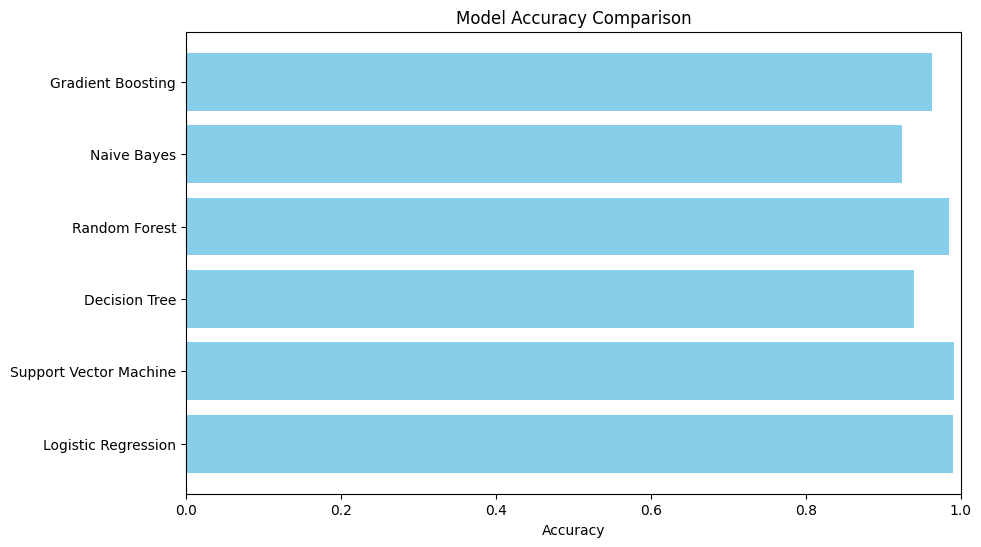

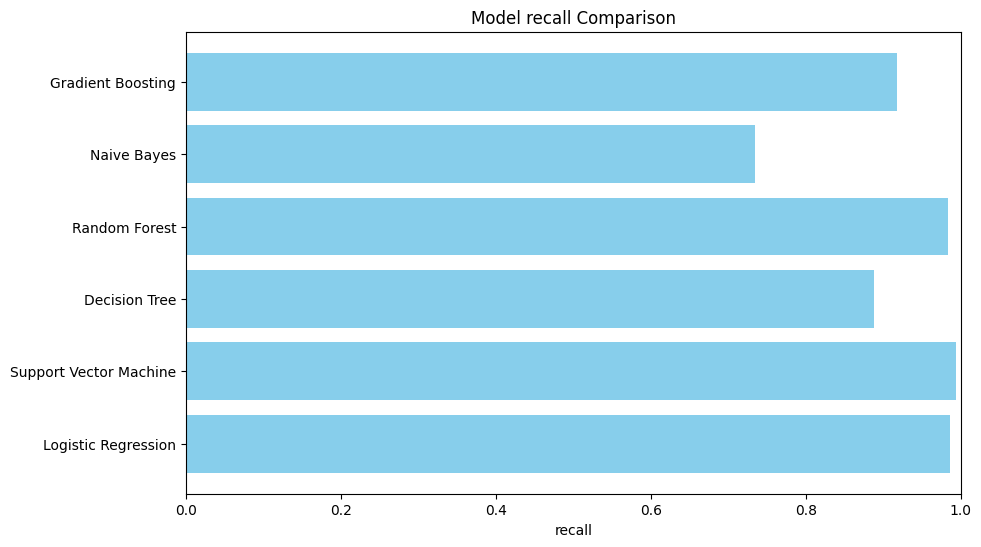

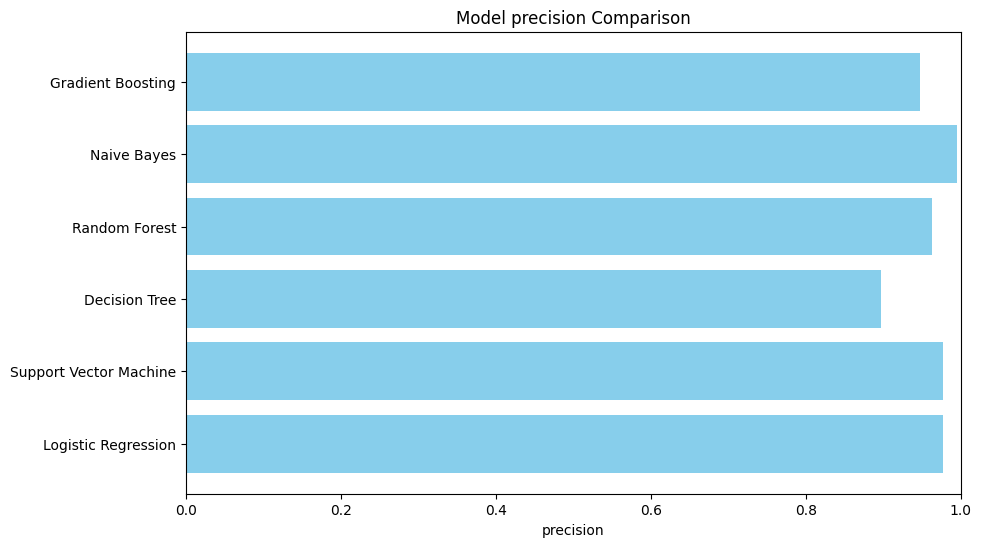

In [ ]:
# Store the results for each model on the second dataset
model_names = []
accuracies = []
recalls = []
precisions = []

# Evaluate each model and store the results
for model_name, model in models.items():
    accuracy, precision, recall = evaluate_model(model, X_train_features2, y_train2, X_test_features2, y_test2)
    model_names.append(model_name)
    accuracies.append(accuracy)
    recalls.append(recall)
    precisions.append(precision)
    print(f"{model_name}:")
    print(f"  Accuracy: {accuracy}")
    print(f"  Precision: {precision}")
    print(f"  Recall: {recall}")
    print("="*30)

# Plot the accuracy results
plt.figure(figsize=(10, 6))
plt.barh(model_names, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xlim(0, 1)  # Since accuracy is between 0 and 1
plt.show()

# Plot the recall results
plt.figure(figsize=(10, 6))
plt.barh(model_names, recalls, color='skyblue')
plt.xlabel('recall')
plt.title('Model recall Comparison')
plt.xlim(0, 1)  # Since recall is between 0 and 1
plt.show()

# Plot the precision results
plt.figure(figsize=(10, 6))
plt.barh(model_names, precisions, color='skyblue')
plt.xlabel('precision')
plt.title('Model precision Comparison')
plt.xlim(0, 1)  # Since precision is between 0 and 1
plt.show()

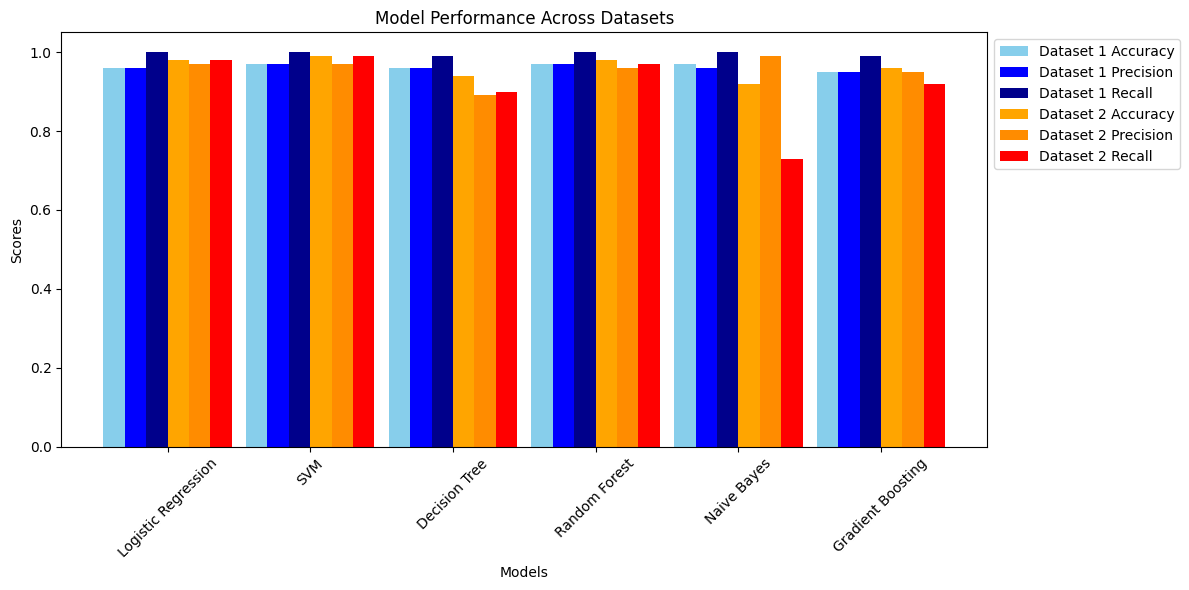

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define model names and metrics from Dataset 1
models = ['Logistic Regression', 'SVM', 'Decision Tree', 'Random Forest', 'Naive Bayes', 'Gradient Boosting']
dataset_1_metrics = {
    'Accuracy': [0.96, 0.97, 0.96, 0.97, 0.97, 0.95],
    'Precision': [0.96, 0.97, 0.96, 0.97, 0.96, 0.95],
    'Recall': [1.0, 1.0, 0.99, 1.0, 1.0, 0.99]
}

# Metrics from Dataset 2
dataset_2_metrics = {
    'Accuracy': [0.98, 0.99, 0.94, 0.98, 0.92, 0.96],
    'Precision': [0.97, 0.97, 0.89, 0.96, 0.99, 0.95],
    'Recall': [0.98, 0.99, 0.90, 0.97, 0.73, 0.92]
}

# Define the number of models and bar width
num_models = len(models)
bar_width = 0.15

# Create bar positions for each metric group
indices = np.arange(num_models)

# Plot bars for Dataset 1 and Dataset 2 metrics
fig, ax = plt.subplots(figsize=(12, 6))

# Bars for Dataset 1
ax.bar(indices - bar_width, dataset_1_metrics['Accuracy'], bar_width, label='Dataset 1 Accuracy', color='skyblue')
ax.bar(indices, dataset_1_metrics['Precision'], bar_width, label='Dataset 1 Precision', color='blue')
ax.bar(indices + bar_width, dataset_1_metrics['Recall'], bar_width, label='Dataset 1 Recall', color='darkblue')

# Bars for Dataset 2
ax.bar(indices + 2*bar_width, dataset_2_metrics['Accuracy'], bar_width, label='Dataset 2 Accuracy', color='orange')
ax.bar(indices + 3*bar_width, dataset_2_metrics['Precision'], bar_width, label='Dataset 2 Precision', color='darkorange')
ax.bar(indices + 4*bar_width, dataset_2_metrics['Recall'], bar_width, label='Dataset 2 Recall', color='red')

# Labeling
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Performance Across Datasets')
ax.set_xticks(indices + bar_width * 1.5)
ax.set_xticklabels(models, rotation=45)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()


In [ ]:
email = "I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

email_features = feature_extraction2.transform([email])
prediction = model_logistic.predict(email_features)
print(prediction)

if (prediction[0]==1):
  print('Ham mail')

else:
  print('Spam mail')

[1]
Ham mail
